In [1]:
import pandas as pd
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Data Explorations and preprocessing 

In [2]:
#check for the number of rows and columns
df.shape

(200, 4)

In [3]:
#overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
#statistical description of dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
#check for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Data visualization 

In [6]:
import matplotlib.pyplot as plt

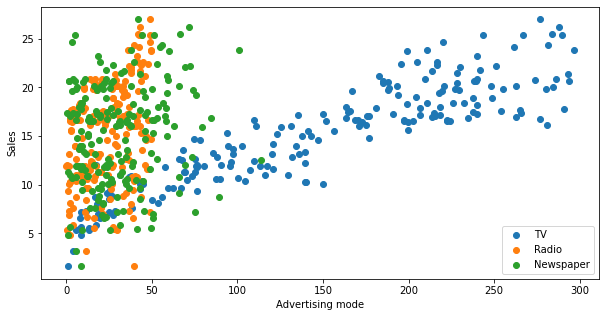

In [15]:
#scatter plot for features vs the target
plt.figure(figsize=(10,5))
plt.scatter(df['TV'],df['Sales'],label='TV')
plt.scatter(df['Radio'],df['Sales'],label='Radio')
plt.scatter(df['Newspaper'],df['Sales'],label='Newspaper')
plt.xlabel('Advertising mode')
plt.ylabel('Sales')
plt.legend()
plt.show()

From the graph above we can conclude that there are no much outliers in the dataset.lets try to detect outliers using boxplot

In [16]:
import seaborn as sns

C:\Users\Sanjana\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:xlabel='TV'>

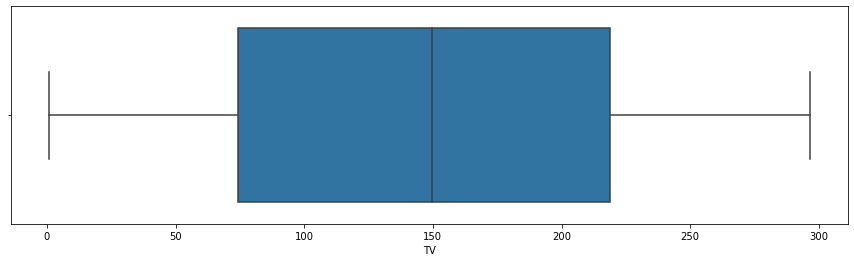

In [23]:
#boxplot to detect outlier
plt.figure(figsize=(15,4))
sns.boxplot(df['TV'])

<AxesSubplot:xlabel='Radio'>

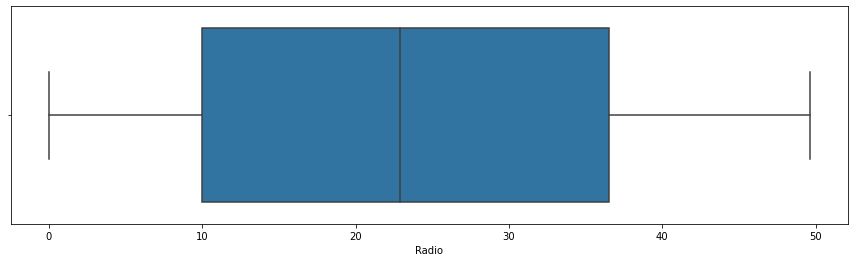

In [26]:
plt.figure(figsize=(15,4))
sns.boxplot(df['Radio'])

<AxesSubplot:xlabel='Newspaper'>

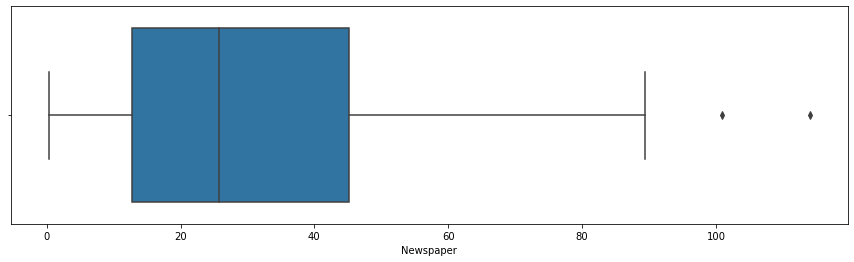

In [24]:
plt.figure(figsize=(15,4))
sns.boxplot(df['Newspaper'])

### Model selection and training

In [37]:
#feature and target set
x=df.drop(['Sales'],axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [38]:
y=df['Sales']
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [39]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [41]:
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
pred=lr.predict(x_test)

In [43]:
pred

array([18.85967217, 10.55682188,  8.85344696, 12.23142838, 19.39914056,
       24.01889166,  9.86399318, 25.12386339, 15.98453027,  9.04262332,
       11.35944322, 19.58962555, 11.19176775, 12.09671261, 21.38832547,
       16.8441139 , 14.24912422,  8.25384897, 17.72178223, 21.14801188,
       23.69663367, 21.47727335,  9.08328565, 12.83276275, 12.67365588,
       19.14285437, 12.5728979 ,  9.33593976,  8.89176778,  8.15836075,
        9.40275888, 18.9323905 , 20.56470489, 10.20948051, 19.49086284,
       19.34076455, 16.98163571,  6.27887875, 10.98174691, 20.31763211])

In [60]:
y_test.head(10)

70     18.3
46     10.6
44      8.5
73     11.0
14     19.0
36     25.4
191    11.9
98     25.4
160    16.4
66     11.0
Name: Sales, dtype: float64

### Model Evaluation 

In [65]:
lr.score(x_test,y_test)

0.871541730861787

In [70]:
lr.predict([[17.2,45.9,69.3]])

array([10.74608177])